1. Baca data "Covid19.csv'

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

from scipy import stats
from sklearn import linear_model

data1=pd.read_csv("Covid19.csv")
data1.head()

,Test,Positive
0,659338,23554
1,676527,20124
2,757350,22434
3,791044,21731
4,838747,24235


2. Gambar grafik scatter variabel 'Test' pada posisi x-axis dan variabel 'Prositive' pada 'y-axis'!

Text(0, 0.5, 'Positive')

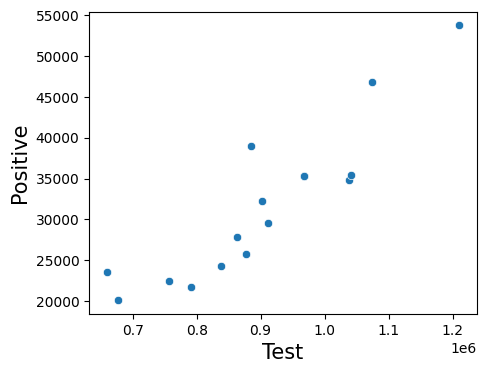

In [12]:
plt.subplots(figsize=(5,4), dpi=100)
ax=sns.scatterplot(x="Test", y="Positive", data=data1, marker='o')
ax.set_xlabel('Test', fontsize=15)
ax.set_ylabel('Positive', fontsize=15)

3. Latih model regresi linier untuk menentukan "garis kecocokan terbaik" untuk data ini!

In [37]:
reg1=linear_model.LinearRegression()

reg1.fit(data1["Test"].to_numpy().reshape(-1,1), data1["Positive"])

LinearRegression()

4. Tampilkan nilai intercept coefficient (alpha) dan regression coefficien (beta) dari model regresi linear yang sudah dibuat! 

In [15]:
print("Intercept Coefficient alpha = %.3f"%(reg1.intercept_))
print("Regression Coefficien beta = %.3f"%(reg1.coef_))

Intercept Coefficient alpha = -20379.228
Regression Coefficien beta = 0.058


5. Gambarlah plot model regresi linier bersama plot scatter di soal nomor 2!

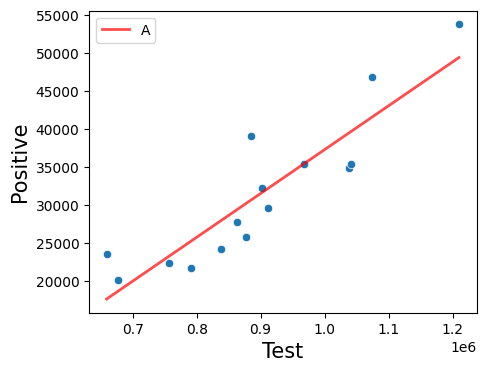

In [22]:
plt.subplots(figsize=(5,4), dpi=100)
ax=sns.scatterplot(x="Test", y="Positive", data=data1, marker='o')
ax.set_xlabel('Test', fontsize=15)
ax.set_ylabel('Positive', fontsize=15)

min=data1['Test'].min()-1
max=data1['Test'].max()+1
model=reg1.predict(np.arange(min,max).reshape(-1,1))
ax=sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7,lw=2)

6.  Hitunglah goodness of fit R2!

In [42]:
from sklearn.metrics import r2_score

dataX=pd.DataFrame(data1["Test"])
dataY=data1.drop('Test', axis='columns')

predictCov = reg1.predict(dataX)

ssT= [((data1["Positive"][i]-np.mean(data1["Positive"]))**2) for i in range(0, len(data1["Positive"]))]
ssR= [((data1["Positive"][i]-predictCov[i])**2)                   for i in range(0, len(data1["Positive"]))]
ssM= [((predictCov[i]-np.mean(data1["Positive"]))**2) for i in range(0, len(data1["Positive"]))]

print("R2 (sklearn): ", r2_score(data1["Positive"],predictCov))
print("R2 (method A): ", np.sum(ssM)/np.sum(ssT))
print("R2 (method B): ", 1 - np.sum(ssR)/np.sum(ssT))

R2 (sklearn):  0.8108087147597196
R2 (method A):  0.8108087147597193
R2 (method B):  0.8108087147597196


7. Hitunglah jumlah perkiraan kasus positive jika dilakukan test sebanyak 2000000!

In [74]:
test=2000000
jumlahkasus=reg1.predict([[test]])
print("Jumlah perkiraan kasus positive jika dilakukan test sebanyak %d adalah %.3f"%(test,jumlahkasus))

Jumlah perkiraan kasus positive jika dilakukan test sebanyak 2000000 adalah 94965.727


8. Tambahkan data outlier Test = 1500000 dan Positive = 5000 pada dataset Covid19.cvs!

In [122]:
data2 = data1.append({'Test':1500000,'Positive':5000}, ignore_index=True)
print(cvo)

       Test  Positive
0    659338     23554
1    676527     20124
2    757350     22434
3    791044     21731
4    838747     24235
5    863554     27824
6    876646     25770
7    885453     39028
8    901997     32201
9    911012     29553
10   968588     35347
11   968588     35347
12  1038954     34864
13  1041099     35460
14  1074493     46838
15  1210002     53762
16  1500000      5000


9. Gambarlah grafik scatter variabel 'Test' pada posisi x-axis dan variabel 'Prositive' pada 'y-axis'!

Text(0, 0.5, 'Positive')

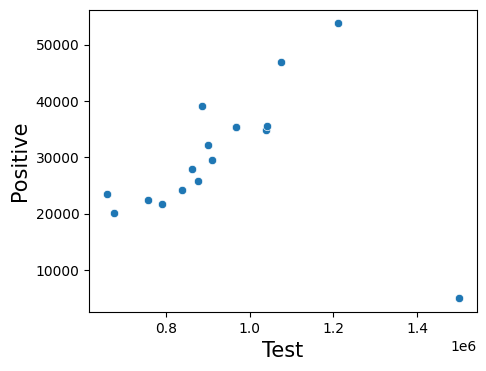

In [123]:
plt.subplots(figsize=(5,4), dpi=100)
ax=sns.scatterplot(x="Test", y="Positive", data=data2, marker='o')
ax.set_xlabel('Test', fontsize=15)
ax.set_ylabel('Positive', fontsize=15)

10. Latih model regresi linier untuk menentukan "garis kecocokan terbaik" untuk data setelah ditambahkan outlier!

In [130]:
reg1=linear_model.LinearRegression()

reg1.fit(data2["Test"].to_numpy().reshape(-1,1), data2["Positive"])

LinearRegression()

11. Hitunglah goodness of fit R2 pada data setelah ditambah outlier!

In [137]:
dataX1=pd.DataFrame(data2["Test"])
dataY1=data2.drop('Test', axis='columns')

predictCovid19 = reg1.predict(dataX1)

print("R2 (sklearn): ", r2_score(data2["Positive"],predictCovid19))

R2 (sklearn):  0.009403446344090294


12. Tampilkan nilai R2 dari data asli (data sebelum ditambah outlier) dan data outlier (data setelah ditambah outlier)!

In [138]:
print("R2 Data Asli(sklearn): ", r2_score(data1["Positive"],predictCov))
print("R2 Data Outlier(sklearn): ", r2_score(data2["Positive"],predictCovid19))

R2 Data Asli(sklearn):  0.8108087147597196
R2 Data Outlier(sklearn):  0.009403446344090294


13. Apa kesimpulan anda tentang penggunaan model Regressi Linear pada data outlier? 

data outlier sebaiknya menggunakan pemodelan yang lebih baik seperti regresi robust,  karena jika menggunakan model regressi linear kurang tepat untuk data outlier 